In [1]:
import pandas as pd
import numpy as np
from collections import namedtuple
path = '/home/hb/python/lof/CMAP/trt'
import os

In [2]:
"""trt 파일 불러오기"""
os.chdir(path)



L1000 = namedtuple("L1000", ['shRNA', 'compound', 'CRISPR', 'etc', 'control'])
trt_sh = pd.read_pickle("trt_shRNA.pkl")
trt_ctl = pd.read_pickle("trt_control.pkl")
trt_etc = pd.read_pickle("trt_misc_etc.pkl")
trt_cp = pd.read_pickle("trt_compound.pkl")
trt_xpr = pd.read_pickle("trt_xpr_CRISPR.pkl")

l1000 = L1000(trt_sh, trt_cp, trt_xpr, trt_etc, trt_ctl)

In [3]:
"""cell 정보 파일 불러오기"""
os.chdir("/home/hb/python/lof/CMAP/info")
cell = pd.read_csv("cellinfo_beta.txt", sep=',')

"""compound 중에 moa가 있는 것만 뽑기 -> target 정보 유무 확인"""
compoundinfo = pd.read_csv("compound_target_info.txt", sep=',')
compoundinfo = compoundinfo[compoundinfo.moa.notnull()].reset_index(drop=True)
# compoundinfo.to_csv("/home/hb/python/lof/clue/info/compoundinfo_beta.txt", index=False)
compoundinfo = pd.read_csv("compound_target_info.txt", )

"""gene 정보 파일 불러오기"""
geneinfo = pd.read_csv("geneinfo_beta.txt", sep=',')

"""signature 정보 파일 불러오기"""
siginfo = pd.read_csv("siginfo_beta.txt", sep='\t')
siginfo.index = siginfo.sig_id

"""pert 정보 파일 불러오기"""
pert_info = pd.read_csv("GSE92742_Broad_LINCS_pert_info.txt", sep='\t')

"""전체 정보 정리"""
Info = namedtuple("Info", ['cell', 'compound', 'geneinfo', 'siginfo', 'pertinfo'], defaults=(None, ) * 4)
info = Info(cell, compoundinfo, geneinfo, siginfo, pert_info)

/tmp/ipykernel_456586/2405445695.py:15: DtypeWarning: Columns (0,3,4,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  siginfo = pd.read_csv("siginfo_beta.txt", sep='\t')


In [4]:
siginfo.columns
siginfo.pert_type.unique()

array(['trt_cp', 'trt_oe', 'trt_sh', 'trt_si', 'trt_aby', 'trt_lig',
       'trt_xpr', 'ctl_vector', 'ctl_vehicle', 'ctl_untrt',
       'ctl_vector.cns', 'ctl_vehicle.cns', 'ctl_untrt.cns', 'ctl_x',
       'trt_sh.cgs', 'trt_sh.css'], dtype=object)

In [5]:
pbgene_count = pd.DataFrame(siginfo.cmap_name.unique(), columns=['pbgene',])
pbgene_count = pbgene_count.drop_duplicates(subset=['pbgene'], ).reset_index(drop=True)
pbgene_count['counts'] = 0
pbgene_count.index = pbgene_count.pbgene
del pbgene_count['pbgene']
pbgene_count

,counts
pbgene,
BRD-U44432129,0
vorinostat,0
HMN-214,0
tanespimycin,0
neratinib,0
...,...
BRD-K92897494,0
BRD-K47700511,0
BRD-K63427963,0


In [6]:
siginfo_total = pd.read_csv("siginfo_beta_전체.txt", sep='\t')
siginfo_total.index = siginfo_total.sig_id
del siginfo_total['sig_id']
siginfo_total_dict = siginfo_total.to_dict()['cmap_name']

In [7]:
def make_sigid_cmap_df(df):

    make_df = pd.DataFrame(set(df.columns), columns=['sigid',])

    make_df['cmap_name'] = make_df['sigid'].map(siginfo_total_dict)
    return make_df

In [8]:
trt_cpp = make_sigid_cmap_df(trt_cp)
trt_ctll = make_sigid_cmap_df(trt_ctl)
trt_etcc = make_sigid_cmap_df(trt_etc)
trt_xprr = make_sigid_cmap_df(trt_xpr)
trt_shh = make_sigid_cmap_df(trt_sh)

In [10]:
compound_dict = {x: y for x, y in zip(compoundinfo.cmap_name, compoundinfo.target)}
trt_cpp['target'] = trt_cpp['cmap_name'].apply(lambda x: compound_dict[x] if x in compound_dict.keys() else np.nan)
trt_cpp_target = trt_cpp[~trt_cpp['target'].isna()]
total_cmap_name = set(trt_xprr.cmap_name.unique()) | set(trt_shh.cmap_name.unique()) | set(trt_cpp_target.target.unique()) | set(trt_etcc.cmap_name.unique())

In [58]:
pbgene_count = pd.DataFrame(total_cmap_name, columns=['pbgene',])
pbgene_count = pbgene_count.drop_duplicates(subset=['pbgene'], ).reset_index(drop=True)
pbgene_count['counts'] = 0
pbgene_count.index = pbgene_count.pbgene
del pbgene_count['pbgene']
pbgene_count

,counts
pbgene,
VPS9D1,0
C16ORF80,0
TAATGTG,0
B9D1,0
TCAGGTC,0
...,...
TCGCTTC,0
SPRED2,0
ATTATGG,0


In [37]:
# del trt_cpp['cmap_name']
# trt_cpp.rename(columns={'target': 'cmap_name'}, inplace=True)
trt_cpp = trt_cpp[~trt_cpp['cmap_name'].isna()]
trt_cpp.reset_index(drop=True, inplace=True)

,sigid,cmap_name
1,REP.B019_MDAMB231_24H:F06,KCNK9
2,REP.B002_HT29_24H:E13,GABRQ
5,REP.A021_A549_24H:A07,DRD3
8,CPD003_MCF7_6H:BRD-A58048407-001-11-3:10,CACNA1S
11,REP.B024_HEK293_24H:B10,PTGS2
...,...,...
720204,LJP008_HUVEC.A_24H:J11,HDAC4
720207,REP.B026_HT29_24H:O19,GABRA1
720209,REP.B006_A375_24H:H03,TBXAS1
720210,ASG002_SNU407_24H:I14,ERBB2


In [59]:
from tqdm import tqdm

pbgene_count_index = set(pbgene_count.index)
for trt in tqdm([trt_cpp, trt_xprr, trt_etcc, trt_shh]):
    for row in tqdm(range(len(trt))):
        _cmap_name = trt.cmap_name[row]
        if _cmap_name in pbgene_count_index:
            pbgene_count.loc[_cmap_name] +=1

100%|██████████| 4/4 [01:46<00:00, 26.57s/it]


In [100]:
len(pbgene_count.index), len(gpsadb_count.pbgene)

(12011, 1458)

In [67]:
len(set(pbgene_count.index)&set(gpsadb_count.pbgene))

760

In [94]:
pbgene_count = pbgene_count[~pbgene_count.index.isna()]

pbgene_count.sort_values(by='counts', ascending=False)
pbgene_count.rename(columns={'counts': '#Datasets'}, inplace=True)

KeyError: 'counts'

/tmp/ipykernel_456586/3630553457.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pbgene_count['#Datasets'], kde=True, rug=True)


Text(0.5, 1.0, 'CMAP dataset')

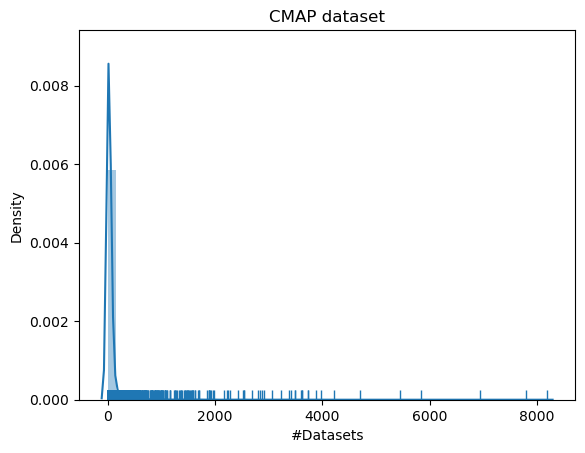

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(pbgene_count['#Datasets'], kde=True, rug=True)
plt.title("CMAP dataset")
# plt.show()

/tmp/ipykernel_456586/2734185091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gpsadb_count['#Datasets'], kde=True, rug=True)


Text(0.5, 1.0, 'gpsadb dataset')

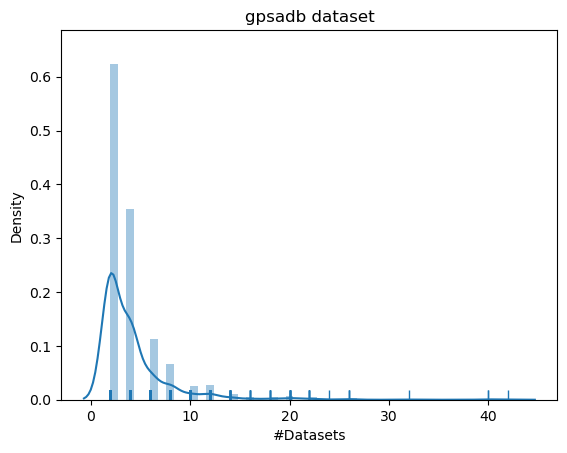

In [91]:
sns.distplot(gpsadb_count['#Datasets'], kde=True, rug=True)
plt.title("gpsadb dataset")
# plt.show()

# gpsadb_count

In [65]:
gpsadb_count = pd.read_csv("/home/hb/python/lof/gpsadb/num_of_pbgene_datasets.csv")
gpsadb_count.pbgene

0         AARS1
1       ATP5F1C
2        POLR1G
3         GARS1
4         RACK1
         ...   
1453    ATXN7L3
1454        CIC
1455      UBE2K
1456     NFATC3
1457      SMC1A
Name: pbgene, Length: 1458, dtype: object